# Monitoring with alibi_detect

If needed install:

In [77]:
!pip install matplotlib~=3.9.2 seaborn~=0.13.2 numpy~=1.26.4

## Introduction

Illustrating the need to monitor metrics at various window sizes to catch performance degradation as soon as possible.

Imagine we are logging/saving the F1 metrics every day for 35 days. To mimic this, we will output random numbers in predefined intervals for every hour of the 35 days.

- For the first 20 days we will use the interval [94, 98)
- For the next 5 days we will use the interval [92, 96)
- For the next 5 days we will use the interval [88, 96)
- For the last 5 days we will use the interval [86, 92)

Please note how the interval for random generating changes, this is how we mimic a drift in the data.

In [85]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

# Generate data
hourly_f1 = list(np.random.randint(low=94, high=98, size=24*20)) + \
            list(np.random.randint(low=92, high=96, size=24*5)) + \
            list(np.random.randint(low=88, high=96, size=24*5)) + \
            list(np.random.randint(low=86, high=92, size=24*5))

##### **TODO:** Compute the **cumulative mean** of the F1 values given in `hourly_f1`.

For example for an array `[3, 1, 2, 10]` a cumulative mean array would be: `[3, 2, 2, 4]`.

Explanation:
- at iteration 0: we use the element at 0th position in original array to calculate the mean --> 3/1=3
- at iteration 1: we use the elements at 0th and 1st position in original array to calculate the mean --> (3+1)/2=2
- at iteration 2: we use the elements at 0th, 1st and 2nd position in original array to calculate the mean --> (3+1+2)/3=2
- at iteration 3: we use the elements at 0th and up to 3rd position in original array to calculate the mean --> (3+1+2+10)/4=4

In [83]:
# cumulative_mean = [np.mean(hourly_f1[:i]) for i in range(1, len(hourly_f1)+1)]
cumulative_mean = np.cumsum(hourly_f1) / np.arange(1, len(hourly_f1) + 1)

##### **TODO:** Print the average cumulative F1 on the last day.

In [84]:
last_day_cum_mean = np.mean(hourly_f1[-24:])

print(f"The average cumulative F1 on the last day is: {last_day_cum_mean:.2f}")

The average cumulative F1 on the last day is: 88.21


##### **TODO:** Calculate the **daily sliding F1** of the values given in `hourly_f1`.

For example for an array [ 4,  2,  3,  8, -6, 10] a sliding average with a window of size 3 would be: [3, 4.33, 1.667, 4].

Explanation:

- at iteration 0: we use the first 3 elements to calculate the mean --> (4+2+3)/3=3
- at iteration 1: we use the elements at 1st,2nd,3rd position in original array to calculate the mean --> (2+3+8)/3=4.333
- at iteration 2: we use the elements at 2nd,3rd,4th position in original array to calculate the mean --> (3+8-6)/3=1.667
- at iteration 3: we use the elements at 3rd,4th,5th position in original array to calculate the mean --> (8-6+10)/3=4

In [86]:
def day_sliding_f1(arr, window=24):
    sliding_avg = []
    for i in range(len(arr) - window+1):
        avg = np.mean(arr[i:i+window])
        sliding_avg.append(avg)
    return sliding_avg

# Calculate the daily sliding F1
daily_sliding_f1 = day_sliding_f1(hourly_f1)

# Print the daily sliding F1 values
print("Daily sliding F1 values:")
for i, f1 in enumerate(daily_sliding_f1):
    print(f"Day {i+1}: {f1:.3f}")


Daily sliding F1 values:
Day 1: 95.667
Day 2: 95.750
Day 3: 95.792
Day 4: 95.792
Day 5: 95.875
Day 6: 95.792
Day 7: 95.833
Day 8: 95.792
Day 9: 95.875
Day 10: 95.792
Day 11: 95.875
Day 12: 95.750
Day 13: 95.833
Day 14: 95.792
Day 15: 95.833
Day 16: 95.833
Day 17: 95.875
Day 18: 95.792
Day 19: 95.833
Day 20: 95.750
Day 21: 95.708
Day 22: 95.708
Day 23: 95.708
Day 24: 95.708
Day 25: 95.667
Day 26: 95.583
Day 27: 95.542
Day 28: 95.500
Day 29: 95.500
Day 30: 95.542
Day 31: 95.500
Day 32: 95.458
Day 33: 95.333
Day 34: 95.333
Day 35: 95.250
Day 36: 95.333
Day 37: 95.333
Day 38: 95.250
Day 39: 95.292
Day 40: 95.292
Day 41: 95.250
Day 42: 95.250
Day 43: 95.167
Day 44: 95.208
Day 45: 95.250
Day 46: 95.125
Day 47: 95.042
Day 48: 95.125
Day 49: 95.042
Day 50: 95.167
Day 51: 95.167
Day 52: 95.250
Day 53: 95.167
Day 54: 95.083
Day 55: 95.125
Day 56: 95.167
Day 57: 95.250
Day 58: 95.250
Day 59: 95.208
Day 60: 95.208
Day 61: 95.083
Day 62: 95.125
Day 63: 95.125
Day 64: 95.125
Day 65: 95.167
Day 66: 9

In [87]:
#  Another way...
def day_sliding_f1(arr, window=24):
    # Use NumPy's convolution for sliding window averages for better performance
    return np.convolve(arr, np.ones(window)/window, mode='valid')


# Calculate the daily sliding F1
daily_sliding_f1 = day_sliding_f1(hourly_f1)

# Print the daily sliding F1 values
print("Daily sliding F1 values:")
for i, f1 in enumerate(daily_sliding_f1):
    print(f"Day {i+1}: {f1:.3f}")

Daily sliding F1 values:
Day 1: 95.667
Day 2: 95.750
Day 3: 95.792
Day 4: 95.792
Day 5: 95.875
Day 6: 95.792
Day 7: 95.833
Day 8: 95.792
Day 9: 95.875
Day 10: 95.792
Day 11: 95.875
Day 12: 95.750
Day 13: 95.833
Day 14: 95.792
Day 15: 95.833
Day 16: 95.833
Day 17: 95.875
Day 18: 95.792
Day 19: 95.833
Day 20: 95.750
Day 21: 95.708
Day 22: 95.708
Day 23: 95.708
Day 24: 95.708
Day 25: 95.667
Day 26: 95.583
Day 27: 95.542
Day 28: 95.500
Day 29: 95.500
Day 30: 95.542
Day 31: 95.500
Day 32: 95.458
Day 33: 95.333
Day 34: 95.333
Day 35: 95.250
Day 36: 95.333
Day 37: 95.333
Day 38: 95.250
Day 39: 95.292
Day 40: 95.292
Day 41: 95.250
Day 42: 95.250
Day 43: 95.167
Day 44: 95.208
Day 45: 95.250
Day 46: 95.125
Day 47: 95.042
Day 48: 95.125
Day 49: 95.042
Day 50: 95.167
Day 51: 95.167
Day 52: 95.250
Day 53: 95.167
Day 54: 95.083
Day 55: 95.125
Day 56: 95.167
Day 57: 95.250
Day 58: 95.250
Day 59: 95.208
Day 60: 95.208
Day 61: 95.083
Day 62: 95.125
Day 63: 95.125
Day 64: 95.125
Day 65: 95.167
Day 66: 9

##### **TODO:** Print the average sliding F1 on the last day.

In [90]:
# Print the average sliding F1 on the last day
last_day_f1 = daily_sliding_f1[-1]
print(f"\nAverage sliding F1 on the last day: {last_day_f1:.2f}")


Average sliding F1 on the last day: 89.21


##### **TODO:** Plot the cumulative and sliding values on a graph.

- Y-axes can be limited to `[80,100]`.

- Optionally, add a threshold line at `y=90`

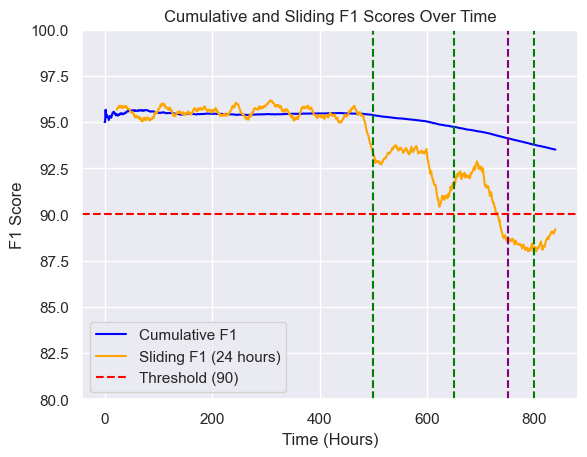

In [95]:
# Plot cumulative F1
plt.plot(cumulative_mean, label='Cumulative F1', color='blue')

# Plot sliding F1
plt.plot(np.arange(23, len(hourly_f1)), daily_sliding_f1, label='Sliding F1 (24 hours)', color='orange')

# Add a horizontal threshold line at y=90
# plt.hlines(y=90, xmin=0, xmax=len(hourly_f1), color='red', linestyle='--', label='Threshold (90)')
plt.axhline(y=90, color='red', linestyle='--', label='Threshold (90)')

# Add vertical lines to mark the intervals where the performance changes
plt.axvline(x=500, color='green', linestyle='--')
plt.axvline(x=650, color='green', linestyle='--')
plt.axvline(x=750, color='purple', linestyle='--')
plt.axvline(x=800, color='green', linestyle='--')

            
# Set y-axis limit
plt.ylim(80, 100)

# Add labels and title
plt.title('Cumulative and Sliding F1 Scores Over Time')
plt.xlabel('Time (Hours)')
plt.ylabel('F1 Score')

# Add legend
plt.legend()

# Show the plot
plt.show()

- Initial Period (0-500 hours): Both cumulative and sliding F1 scores show stable and consistent performance, with only slight fluctuations.

- Degradation Phase (~500-650 hours): Performance starts to degrade after 500 hours. The sliding F1 captures this earlier and more acutely than the cumulative F1. This suggests that monitoring short-term performance is crucial in catching problems early, as cumulative metrics may hide recent deteriorations.

- Critical Period (~600-800 hours): The sliding F1 indicates a sharp performance drop, dipping below the threshold of 90, indicating poor model performance.

- Recovery (~750-800 hours): While there is a slight upward trend in the sliding F1 after the sharp drop, performance has not fully returned to the initial high levels.

## Data

In [96]:
import json
import pandas as pd
from urllib.request import urlopen

##### **TODO:**
1. Read the `projects` and `tags` files and join them into a `combined` dataframe.
2. Create a new column called `text` where you will place the `title` and `description` joined with a space character -- `{title} {description}`.
3. Drop the `title` and `description` columns.
4. Initialize the `great-expectations` PandasDataset with the previously created `combined` df.

In [102]:
# Load the project and tag data (modify the path/URLs accordingly)
projects_file='data/projects.csv'
tags_file='data/tags.csv'
df_projects = pd.read_csv(projects_file)

df_tags = pd.read_csv(tags_file)

# df_projects.head()
# df_tags.head()
# # Join the DataFrames on a common column (adjust if necessary, e.g., project_id, tag_id, etc.)
combined = pd.merge(df_projects, df_tags, on="id")

# Create a new column 'text' by joining 'title' and 'description'
combined['text'] = combined[['title', 'description']].agg(' '.join, axis=1)

# combined["text"] = combined['title'] + "" + combined['description']
combined.drop(["title", "description"], axis=1, inplace=True)
# # Check the joined DataFrame
combined.head()

,id,created_on,tag,text
0,6,2020-02-20 06:43:18,computer-vision,Comparison between YOLO and RCNN on real world...
1,7,2020-02-20 06:47:21,graph-learning,"Show, Infer & Tell: Contextual Inference for C..."
2,9,2020-02-24 16:24:45,reinforcement-learning,Awesome Graph Classification A collection of i...
3,15,2020-02-28 23:55:26,graph-learning,Awesome Monte Carlo Tree Search A curated list...
4,25,2020-03-07 23:04:31,graph-learning,"AttentionWalk A PyTorch Implementation of ""Wat..."


In [ ]:
pip install great-expectations

In [ ]:
from great_expectations.dataset import PandasDataset

# Initialize the Great Expectations PandasDataset with the combined DataFrame
df_ge = PandasDataset(combined)

# Example expectation: expect the `text` column to not contain null values
df_ge.expect_column_values_to_not_be_null('text')

# Optionally, check the expectations
df_ge.validate()

We will use this dataframe as our reference/original data, data that we used to train our ML models. Not to be mistaken with the "real-world" data received in prod

## Univariate

Drift detection on univariate data.


### Kolmogorov-Smirnov (KS) test

KS test for detecting data drift on input sequence length. We can even monitor aspects of our data that aren't necessarily inputs to the model (ex. length of input text).

In [106]:
!pip install alibi_detect
!pip install pyOpenSSL==22.0.0

In [105]:
from alibi_detect.cd import KSDrift

##### **TODO**:
1. Create a new column that will hold the number of words (e.g., separated by " ") in the `text` column
2. Plot a histogram for the first 200 rows from original dataframe

In [108]:
combined['word_number'] = combined['text'].map(lambda x: len(x.split(" "))) 

combined.head()

,id,created_on,tag,text,word_number
0,6,2020-02-20 06:43:18,computer-vision,Comparison between YOLO and RCNN on real world...,28
1,7,2020-02-20 06:47:21,graph-learning,"Show, Infer & Tell: Contextual Inference for C...",36
2,9,2020-02-24 16:24:45,reinforcement-learning,Awesome Graph Classification A collection of i...,16
3,15,2020-02-28 23:55:26,graph-learning,Awesome Monte Carlo Tree Search A curated list...,16
4,25,2020-03-07 23:04:31,graph-learning,"AttentionWalk A PyTorch Implementation of ""Wat...",17


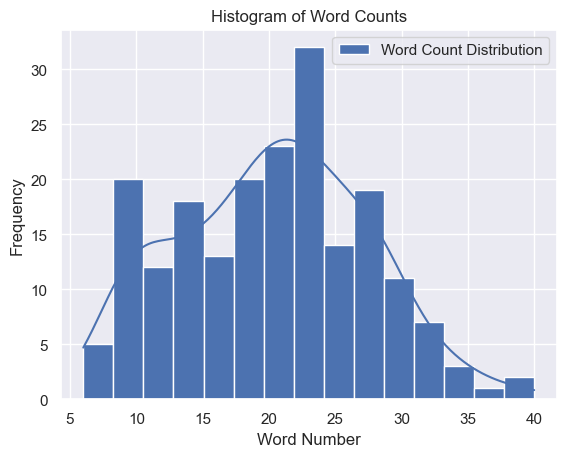

In [118]:
# Limit to the first 200 rows
data_subset = combined.head(200)

# Plot a histogram for a specific numeric column (replace 'column_name' with the actual column)
ax = sns.histplot(data_subset['word_number'], bins=15, kde=True, label='Word Count Distribution')
# Set the opacity (alpha) for the histogram bars
for patch in ax.patches:
    patch.set_alpha(1.0)  # Set the desired alpha value (0.0 is fully transparent, 1.0 is fully opaque)
    
# plt.hist(data_subset['word_number'], bins=100, edgecolor='black', alpha=0.7)

# Adding labels and title
plt.xlabel('Word Number')
plt.ylabel('Frequency')
plt.title('Histogram of Word Counts')
# plt.hist(combined["word_number"])

# Add legend
plt.legend()

##### **TODO:** Initialize the KSDrift detector on the reference data.

In [136]:
x_ref = np.array(list(combined['word_number']))
cd = KSDrift(x_ref, p_val=0.05)

##### **TODO:**
1. Plot a histogram for the first 200 rows from original dataframe (same as previous task).
2. On top of it, plot a histogram for the next 200 rows (i.e., `[200,400)`) from original dataframe

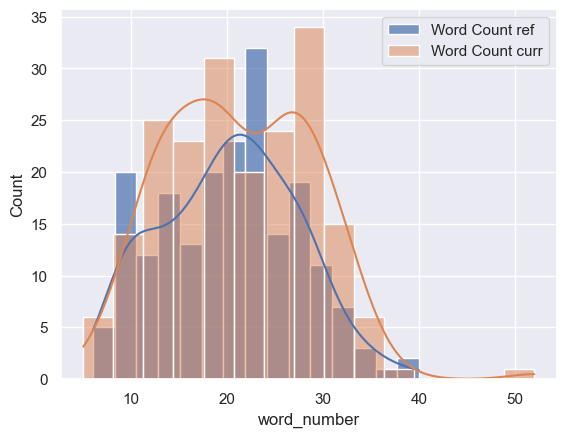

In [144]:
# Limit to the first 200 rows
data_subset = combined.head(200)

# Plot a histogram for a specific numeric column (replace 'column_name' with the actual column)
sns.histplot(data_subset['word_number'], bins=15, kde=True, label='Word Count ref', alpha=0.7)

data_subset_next = combined.iloc[200:400]
x_test = np.array(data_subset_next['word_number'])
# Plot a histogram for a specific numeric column (replace 'word_number' with the actual column)
sns.histplot(x_test, bins=15, kde=True, label='Word Count curr')

# Add legend
plt.legend()



##### **TODO:** Apply the drift detector.

In [138]:
drift_result = cd.predict(x_test)
# Output the result
print("Drift Detection Result:")
print(drift_result)

Drift Detection Result:
{'data': {'is_drift': 0, 'distance': array([0.06931937], dtype=float32), 'p_val': array([0.41089094], dtype=float32), 'threshold': 0.05}, 'meta': {'name': 'KSDrift', 'online': False, 'data_type': None, 'version': '0.12.0', 'detector_type': 'drift'}}


Given that both dataframes are actually part of the same data, there is no noticeble drift to be detected.

##### **TODO:**
1. Create new data (to represent production data) from a normal distribution with mean=30 and std=5; you can create 200 examples.
2. Plot a hist of this data on top of the hist of the reference data (first 200 rows).

In [145]:
np.random.seed(42) # For reproducibility
mu, sigma = 30, 5
new_data = np.random.normal(loc=mu, scale=sigma, size=200)

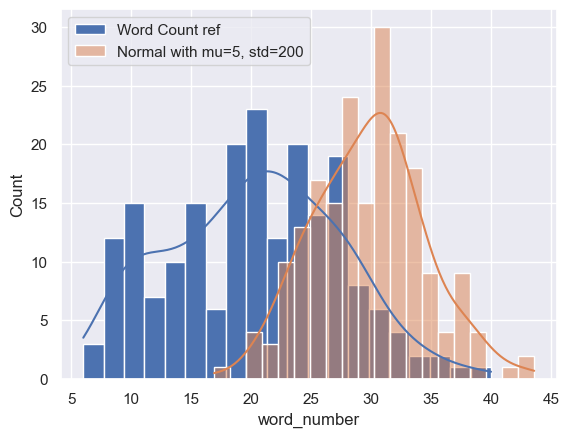

In [150]:
# Limit to the first 200 rows
data_subset = combined.head(200)

# Plot a histogram for a specific numeric column (replace 'column_name' with the actual column)
sns.histplot(data_subset['word_number'], bins=20, kde=True, label='Word Count ref', alpha=1.0)

# df_400 = combined.iloc[200:400]

# # Plot a histogram for a specific numeric column (replace 'word_number' with the actual column)
# sns.histplot(df_400['word_number'], bins=20, kde=True, legend="test data")

# Plot a histogram for a normal distributioin
sns.histplot(new_data, bins=20, kde=True, legend="New data", label='Normal with mu=5, std=200')

plt.legend()

##### **TODO:** Apply the drift detector to the reference data and the normal distributed (production) data.

In [151]:
drift_result = cd.predict(new_data, return_p_val=True)
# Output the result
print("Drift Detection Result:")
print(drift_result)

Drift Detection Result:
{'data': {'is_drift': 1, 'distance': array([0.56931937], dtype=float32), 'p_val': array([0.], dtype=float32), 'threshold': 0.05}, 'meta': {'name': 'KSDrift', 'online': False, 'data_type': None, 'version': '0.12.0', 'detector_type': 'drift'}}


### Chi-squared test

Detecting drift on categorical variables (can be used for data or target drift).


In [195]:
from alibi_detect.cd import ChiSquareDrift

##### **TODO:**
1. Add a new column to the reference data called `token_count`. This column should have the value `small` if the `num_tokens` is less or equal than 10; `medium` if in between (10,25] and `large` if larger than 25.
2. Plot the first 200 data of reference data as a histogram.

Text(0, 0.5, 'Frequency')

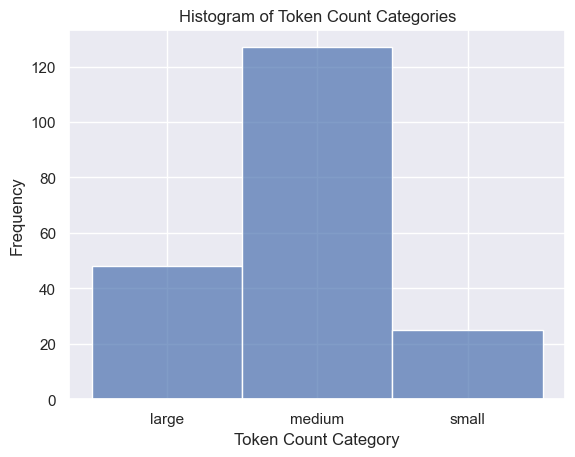

In [196]:
# # Create the 'token_count' column based on conditions
# combined['token_count'] = pd.cut(combined['word_number'],
#                                  bins=[-float('inf'), 10, 25, float('inf')],
#                                  labels=['small', 'medium', 'large']
#                                 )

combined['token_count'] = np.where(combined['word_number'] <= 10, 'small',
                                    np.where(combined['word_number'] <= 25, 'medium', 'large'))

# Plot histogram for 'token_count'
data_subset = combined.head(200)
sns.histplot(data_subset['token_count'], discrete=True, alpha=0.7)

plt.title('Histogram of Token Count Categories')
plt.xlabel('Token Count Category')
plt.ylabel('Frequency')


##### **TODO:** Initialize the drift detector

In [197]:
data_subset = combined.head(200)
x_ref = np.array(data_subset['token_count'])
cd = ChiSquareDrift(x_ref, p_val=0.05)

##### **TODO:**
1. Take the next 200 data rows from original data, and plot it over the reference data (first 200 rows).
2. Apply the drift detector.

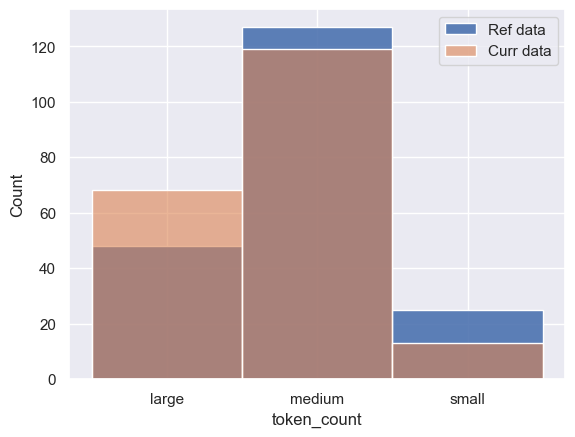

In [198]:
# Plot histogram for 'token_count'
data_subset = combined.head(200)
data_subset_next = combined.iloc[200:400]
sns.histplot(data_subset['token_count'], discrete=True, alpha=0.9, label="Ref data")
sns.histplot(data_subset_next['token_count'], discrete=True, alpha=0.6, label="Curr data")

plt.legend()

In [199]:
# Apply the drift detector to the new data
# The data for drift detection needs to be in the same format as the reference data
test_data = np.array(data_subset_next['token_count'])
result = cd.predict(test_data, return_p_val=True)

result

{'data': {'is_drift': 1,
  'distance': array([7.497912], dtype=float32),
  'p_val': array([0.02354231], dtype=float32),
  'threshold': 0.05},
 'meta': {'name': 'ChiSquareDrift',
  'online': False,
  'data_type': None,
  'version': '0.12.0',
  'detector_type': 'drift'}}

##### **TODO:**
1. Create production data, where you have 80 times `small`, 40 times `medium` and 80 times `large`.
2. Plot the histogram of productions data on top of reference data (first 200 rows).
3. Apply drift detector.

In [200]:
# Create production data
production_data = ['small'] * 80 + ['medium'] * 40 + ['large'] * 80
production_data = pd.Series(production_data, name='token_count')

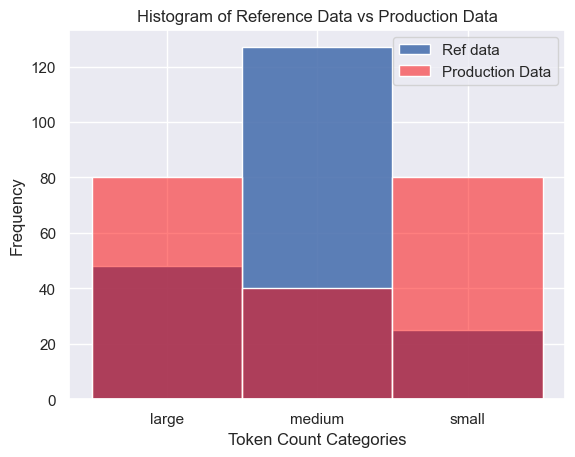

In [189]:
# Plot histogram of reference data
sns.histplot(data_subset['token_count'], discrete=True, alpha=0.9, label="Ref data")

sns.histplot(production_data, label="Production Data", color='red', alpha=0.5)
plt.title('Histogram of Reference Data vs Production Data')
plt.xlabel('Token Count Categories')
plt.ylabel('Frequency')

# Add legend
plt.legend()

In [201]:

result = cd.predict(np.array(production_data))
result 

{'data': {'is_drift': 1,
  'distance': array([82.13287], dtype=float32),
  'p_val': array([1.4624208e-18], dtype=float32),
  'threshold': 0.05},
 'meta': {'name': 'ChiSquareDrift',
  'online': False,
  'data_type': None,
  'version': '0.12.0',
  'detector_type': 'drift'}}